# MADHACKS Crop AI

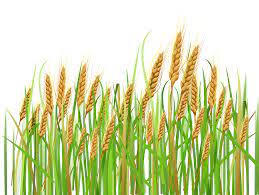

## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#!pip install torchvision

In [4]:
#!pip install nb-black

In [5]:
#!pip install torchsummary

In [6]:
import torch
from torchvision import datasets, transforms, models  # datsets  , transforms
from torch.utils.data.sampler import SubsetRandomSampler
import torch.nn as nn
import torch.nn.functional as F
from datetime import datetime

In [7]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [8]:
transform = transforms.Compose(
    [transforms.Resize(255), transforms.CenterCrop(224), transforms.ToTensor()]
)

<IPython.core.display.Javascript object>

In [9]:
import os
os.getcwd()

'/home/datascience/conda/notebooks/pytorch19_p37_cpu_v1'

<IPython.core.display.Javascript object>

In [10]:
#import zipfile
#with zipfile.ZipFile("/home/datascience/conda/notebooks/pytorch19_p37_cpu_v1/data/Plant_leaf_diseases_dataset_without_augmentation.zip","r") as zip_ref:
#    zip_ref.extractall("/home/datascience/conda/notebooks/pytorch19_p37_cpu_v1/data")

<IPython.core.display.Javascript object>

In [11]:
dataset = datasets.ImageFolder(
    "/home/datascience/conda/notebooks/pytorch19_p37_cpu_v1/data/Plant_leave_diseases_dataset_without_augmentation", transform=transform
)

<IPython.core.display.Javascript object>

In [12]:
dataset

Dataset ImageFolder
    Number of datapoints: 55448
    Root location: /home/datascience/conda/notebooks/pytorch19_p37_cpu_v1/data/Plant_leave_diseases_dataset_without_augmentation
    StandardTransform
Transform: Compose(
               Resize(size=255, interpolation=bilinear, max_size=None, antialias=None)
               CenterCrop(size=(224, 224))
               ToTensor()
           )

<IPython.core.display.Javascript object>

In [13]:
indices = list(range(len(dataset)))

<IPython.core.display.Javascript object>

In [14]:
split = int(np.floor(0.85 * len(dataset)))

<IPython.core.display.Javascript object>

In [15]:
validation = int(np.floor(0.70 * split)) 

<IPython.core.display.Javascript object>

In [16]:
print(0, validation, split, len(dataset))

0 32991 47130 55448


<IPython.core.display.Javascript object>

In [17]:
print(f"length of train size :{validation}")
print(f"length of validation size :{split - validation}")
print(f"length of test size :{len(dataset)-validation}")

length of train size :32991
length of validation size :14139
length of test size :22457


<IPython.core.display.Javascript object>

In [18]:
np.random.shuffle(indices)

<IPython.core.display.Javascript object>

In [19]:
train_indices, validation_indices, test_indices = (
    indices[:validation],
    indices[validation:split],
    indices[split:],
)

<IPython.core.display.Javascript object>

In [20]:
train_sampler = SubsetRandomSampler(train_indices)
validation_sampler = SubsetRandomSampler(validation_indices)
test_sampler = SubsetRandomSampler(test_indices)

<IPython.core.display.Javascript object>

In [21]:
targets_size = len(dataset.class_to_idx)

<IPython.core.display.Javascript object>

# Model Training

In [22]:
class CNN(nn.Module):
    def __init__(self, K):
        super(CNN, self).__init__()
        self.conv_layers = nn.Sequential(
            # convolution layer 1
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(2),
            # convolution layer 2
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2),
            # convolution layer 3
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(2),
            # convolution layer 4
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.MaxPool2d(2),
        )

        self.dense_layers = nn.Sequential(
            nn.Dropout(0.4),
            nn.Linear(50176, 1024),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(1024, K),
        )

    def forward(self, X):
        out = self.conv_layers(X)

        # Flatten
        out = out.view(-1, 50176)

        # Fully connected
        out = self.dense_layers(out)

        return out

<IPython.core.display.Javascript object>

In [23]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


<IPython.core.display.Javascript object>

In [25]:
device = "cpu"

<IPython.core.display.Javascript object>

In [27]:
model = CNN(targets_size)

<IPython.core.display.Javascript object>

In [28]:
model.to(device)

CNN(
  (conv_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)

<IPython.core.display.Javascript object>

In [29]:
from torchsummary import summary

summary(model, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 224, 224]             896
              ReLU-2         [-1, 32, 224, 224]               0
       BatchNorm2d-3         [-1, 32, 224, 224]              64
            Conv2d-4         [-1, 32, 224, 224]           9,248
              ReLU-5         [-1, 32, 224, 224]               0
       BatchNorm2d-6         [-1, 32, 224, 224]              64
         MaxPool2d-7         [-1, 32, 112, 112]               0
            Conv2d-8         [-1, 64, 112, 112]          18,496
              ReLU-9         [-1, 64, 112, 112]               0
      BatchNorm2d-10         [-1, 64, 112, 112]             128
           Conv2d-11         [-1, 64, 112, 112]          36,928
             ReLU-12         [-1, 64, 112, 112]               0
      BatchNorm2d-13         [-1, 64, 112, 112]             128
        MaxPool2d-14           [-1, 64,

<IPython.core.display.Javascript object>

In [30]:
criterion = nn.CrossEntropyLoss()  
optimizer = torch.optim.Adam(model.parameters())

<IPython.core.display.Javascript object>

In [31]:
def batch_gd(model, criterion, train_loader, validation_loader, epochs):
    train_losses = np.zeros(epochs)
    validation_losses = np.zeros(epochs)

    for e in range(epochs):
        t0 = datetime.now()
        train_loss = []
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)

            optimizer.zero_grad()

            output = model(inputs)

            loss = criterion(output, targets)

            train_loss.append(loss.item())  # torch to numpy world

            loss.backward()
            optimizer.step()

        train_loss = np.mean(train_loss)

        validation_loss = []

        for inputs, targets in validation_loader:

            inputs, targets = inputs.to(device), targets.to(device)

            output = model(inputs)

            loss = criterion(output, targets)

            validation_loss.append(loss.item())  # torch to numpy world

        validation_loss = np.mean(validation_loss)

        train_losses[e] = train_loss
        validation_losses[e] = validation_loss

        dt = datetime.now() - t0

        print(
            f"Epoch : {e+1}/{epochs} Train_loss:{train_loss:.3f} Test_loss:{validation_loss:.3f} Duration:{dt}"
        )

    return train_losses, validation_losses


<IPython.core.display.Javascript object>

In [33]:
batch_size = 64
train_loader = torch.utils.data.DataLoader(
    dataset, batch_size=batch_size, sampler=train_sampler
)
test_loader = torch.utils.data.DataLoader(
    dataset, batch_size=batch_size, sampler=test_sampler
)
validation_loader = torch.utils.data.DataLoader(
    dataset, batch_size=batch_size, sampler=validation_sampler
)

<IPython.core.display.Javascript object>

In [38]:
#train_losses, validation_losses = batch_gd(model, criterion, train_loader, validation_loader, 5)

<IPython.core.display.Javascript object>

In [36]:
torch.save(model, '/plant-model/cropaimodel.pkl')

<IPython.core.display.Javascript object>

In [37]:
torch.save(model.state_dict() , 'cropaimodelstate.pkl')

<IPython.core.display.Javascript object>

In [52]:
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

Model's state_dict:
conv_layers.0.weight 	 torch.Size([32, 3, 3, 3])
conv_layers.0.bias 	 torch.Size([32])
conv_layers.2.weight 	 torch.Size([32])
conv_layers.2.bias 	 torch.Size([32])
conv_layers.2.running_mean 	 torch.Size([32])
conv_layers.2.running_var 	 torch.Size([32])
conv_layers.2.num_batches_tracked 	 torch.Size([])
conv_layers.3.weight 	 torch.Size([32, 32, 3, 3])
conv_layers.3.bias 	 torch.Size([32])
conv_layers.5.weight 	 torch.Size([32])
conv_layers.5.bias 	 torch.Size([32])
conv_layers.5.running_mean 	 torch.Size([32])
conv_layers.5.running_var 	 torch.Size([32])
conv_layers.5.num_batches_tracked 	 torch.Size([])
conv_layers.7.weight 	 torch.Size([64, 32, 3, 3])
conv_layers.7.bias 	 torch.Size([64])
conv_layers.9.weight 	 torch.Size([64])
conv_layers.9.bias 	 torch.Size([64])
conv_layers.9.running_mean 	 torch.Size([64])
conv_layers.9.running_var 	 torch.Size([64])
conv_layers.9.num_batches_tracked 	 torch.Size([])
conv_layers.10.weight 	 torch.Size([64, 64, 3, 3])
conv_l

<IPython.core.display.Javascript object>

In [53]:
# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

Optimizer's state_dict:
state 	 {0: {'step': 2580, 'exp_avg': tensor([[[[-6.6147e-04, -5.3269e-04, -6.3684e-04],
          [-6.7448e-04, -5.5900e-04, -5.4380e-04],
          [-1.0410e-03, -5.9893e-04, -6.3083e-04]],

         [[-6.9278e-04, -5.0630e-04, -5.6473e-04],
          [-7.0341e-04, -5.1981e-04, -4.5706e-04],
          [-1.0668e-03, -5.4879e-04, -5.2495e-04]],

         [[-5.3912e-04, -4.4937e-04, -5.6136e-04],
          [-5.3293e-04, -4.4471e-04, -4.3875e-04],
          [-7.9171e-04, -4.2083e-04, -4.6043e-04]]],


        [[[ 0.0000e+00,  0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00]],

         [[ 0.0000e+00,  0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00]],

         [[ 0.0000e+00,  0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00]]],


    

<IPython.core.display.Javascript object>

# Model Evaluation

In [39]:
targets_size = 39
model = CNN(targets_size)
model=torch.load("cropaimodel.pkl")
#model.load_state_dict(torch.load("plant.pt"))
model.eval()

CNN(
  (conv_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)

<IPython.core.display.Javascript object>

In [40]:
def accuracy(loader):
    n_correct = 0
    n_total = 0

    for inputs, targets in loader:
        inputs, targets = inputs.to(device), targets.to(device)

        outputs = model(inputs)

        _, predictions = torch.max(outputs, 1)

        n_correct += (predictions == targets).sum().item()
        n_total += targets.shape[0]

    acc = n_correct / n_total
    return acc

<IPython.core.display.Javascript object>

In [41]:
train_acc = accuracy(train_loader)
test_acc = accuracy(test_loader)
validation_acc = accuracy(validation_loader)

<IPython.core.display.Javascript object>

In [50]:
print(
    f"Train Accuracy : {train_acc}\nTest Accuracy : {test_acc}\nValidation Accuracy : {validation_acc}"
)

Train Accuracy : 0.8682367918523234
Test Accuracy : 0.8471988458764126
Validation Accuracy : 0.8448970931466158


<IPython.core.display.Javascript object>

# Model Artifact

In [20]:
import oci
import ads
import json
import logging
import os
import tempfile
import warnings
from os import path
import numpy as np
import pandas as pd
import time
from ads.common.model_export_util import prepare_generic_model

logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.ERROR)
warnings.filterwarnings('ignore')
ads.set_documentation_mode(False)

In [18]:
#!pip install --upgrade oci

<IPython.core.display.Javascript object>

In [43]:
#!odsc conda init -b madhacks -n sehubemeaprod
#!odsc conda publish -s pytorch19_p37_cpu_v1
# Specify the inference conda environment.
#inference_conda_env = "oci://madhacks@sehubemeaprod/conda_environments/cpu/PyTorch 1.9 for CPU on Python 3.7/1.0/pytorch19_p37_cpu_v1" # replace with your value. 


<IPython.core.display.Javascript object>

In [53]:
# Local path where the artifact will be stored.
path_to_model_artifacts=f"./plant-model"
if not os.path.exists(path_to_model_artifacts):
	os.mkdir(path_to_model_artifacts)

model_artifact = prepare_generic_model(path_to_model_artifacts,
                                               function_artifacts=False,
                                               force_overwrite=True,
                                               data_science_env=False,
                                               inference_conda_env=inference_conda_env)
model.save_pretrained(path_to_model_artifacts)
tokenizer.save_pretrained(path_to_model_artifacts)

# List the template files
print("Model Artifact Path: {}\n\nModel Artifact Files:".format(
    path_to_model_artifacts))
for file in os.listdir(path_to_model_artifacts):
    if path.isdir(path.join(path_to_model_artifacts, file)):
        for file2 in os.listdir(path.join(path_to_model_artifacts, file)):
            print(path.join(file, file2))
    else:
        print(file)

loop1:   0%|          | 0/4 [00:00<?, ?it/s]

INFO:ads.common.model_artifact:To auto-extract taxonomy metadata the model must be provided. Supported models: automl, keras, lightgbm, pytorch, sklearn, tensorflow, and xgboost.
ERROR:ads:ADS Exception
Traceback (most recent call last):
  File "/home/datascience/conda/pytorch19_p37_cpu_v1/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3441, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_278/1601901866.py", line 11, in <module>
    model.save_pretrained(path_to_model_artifacts)
  File "/home/datascience/conda/pytorch19_p37_cpu_v1/lib/python3.7/site-packages/torch/nn/modules/module.py", line 1131, in __getattr__
    if non_full_backward_hooks:
AttributeError: 'CNN' object has no attribute 'save_pretrained'


AttributeError: 'CNN' object has no attribute 'save_pretrained'

<IPython.core.display.Javascript object>

In [ ]:
score = '''
import json
import os
import torch

model_name = 'cropaimodel.pkl'

"""
   Inference script. This script is used for prediction by scoring server when schema is known.
"""


def load_model(model_file_name=model_name):
    """
    Loads model from the serialized format

    Returns
    -------
    model:  a model instance on which predict API can be invoked
    """
    model_dir = os.path.dirname(os.path.realpath(__file__))
    contents = os.listdir(model_dir)
    if model_file_name in contents:
        return torch.load(os.path.join(os.path.dirname(os.path.realpath(__file__)), model_file_name))
    else:
        raise Exception('{0} is not found in model directory {1}'.format(model_file_name, model_dir))


def predict(data, model=load_model()):
    """
    Returns prediction given the model and data to predict

    Parameters
    ----------
    model: Model instance returned by load_model API
    data: Data format as expected by the predict API of the core estimator. For eg. in case of scikit models it could be numpy array/list of list/Panda DataFrame

    Returns
    -------
    predictions: Output from scoring server
        Format: {'prediction':output from model.predict method}

    """
    predicted = model(data)
    return {'prediction':predicted.tolist()}
'''

with open(path.join(path_to_model_artifacts, "score.py"), "w") as f:
    f.write(score)

In [29]:
project_id = os.environ['PROJECT_OCID'] 
compartment_id = os.environ['NB_SESSION_COMPARTMENT_OCID']

mc_model = model_artifact.save(
    project_id=project_id, compartment_id=compartment_id, 
    display_name="cropai_model",
    description="disease diagnostic model",
    ignore_pending_changes=True, timeout=6000)

INFO:ads.common.model_artifact:{
  "git_branch": "None",
  "git_commit": "None",
  "repository_url": "None",
  "script_dir": "/home/datascience/conda/notebooks/pytorch19_p37_cpu_v1/pytorch_artifacts",
  "training_id": null,
  "training_script": "None"
}
['runtime.yaml', 'score.py', '.ipynb_checkpoints', 'torch_lr.pkl']


,Test key,Test name,Result,Message
0,runtime_env_path,Check that field MODEL_DEPLOYMENT.INFERENCE_ENV_PATH is set,Passed,
1,runtime_env_python,Check that field MODEL_DEPLOYMENT.INFERENCE_PYTHON_VERSION is set to a value of 3.6 or higher,Passed,
2,runtime_env_slug,Check that field MODEL_DEPLOYMENT.INFERENCE_ENV_SLUG is set,Failed,"In runtime.yaml, the key MODEL_DEPLOYMENT.INFERENCE_ENV_SLUG must have a value."
3,runtime_env_type,"Check that field MODEL_DEPLOYMENT.INFERENCE_ENV_TYPE is set to a value in (published, data_science)",Failed,"In runtime.yaml, the key MODEL_DEPLOYMENT.INFERENCE_ENV_TYPE must be set to published or data_science."
4,runtime_path_exist,"If MODEL_DEPLOYMENT.INFERENCE_ENV_TYPE is data_science and MODEL_DEPLOYMENT.INFERENCE_ENV_SLUG is set, check that the file path in MODEL_DEPLOYMENT.INFERENCE_ENV_PATH is correct.",Skipped,
5,runtime_slug_exist,"If MODEL_DEPLOYMENT.INFERENCE_ENV_TYPE is data_science, check that the slug listed in MODEL_DEPLOYMENT.INFERENCE_ENV_SLUG exists.",Skipped,
6,runtime_version,Check that field MODEL_ARTIFACT_VERSION is set to 3.0,Passed,
7,runtime_yaml,"Check that the file ""runtime.yaml"" exists and is in the top level directory of the artifact directory",Passed,
8,score_load_model,Check that load_model() is defined,Passed,
9,score_predict,Check that predict() is defined,Passed,


loop1:   0%|          | 0/5 [00:00<?, ?it/s]

artifact:/tmp/saved_model_a85aca23-357c-49f2-82ab-229466f6d9c7.zip


In [33]:
model_artifact.reload(model_file_name="torch_lr.pkl")

['runtime.yaml', 'test_json_output.json', 'score.py', '.ipynb_checkpoints', 'torch_lr.pkl']


In [34]:
model_artifact

Artifact directory: pytorch_artifacts
Contains: ['runtime.yaml', 'test_json_output.json', 'score.py', 'torch_lr.pkl', '.ipynb_checkpoints', '.ipynb_checkpoints/score-checkpoint.py', '.ipynb_checkpoints/runtime-checkpoint.yaml']

# End